<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/%22%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_samples=30, n_features=1, noise=3)

In [ ]:
X.shape

(30, 1)

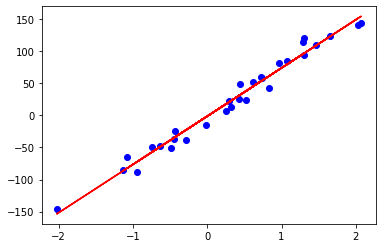

In [ ]:
import matplotlib.pyplot as plt
X, y = make_regression(n_samples=30, n_features=1, noise=15)

plt.plot(X, y, 'bo')
k, b = np.polyfit(X.flatten(), y, deg=1)
plt.plot(X, k * X + b, 'r-')

In [ ]:
X = np.linspace(-10, 10, 20)
y = X ** 3 + 3 * X - 5

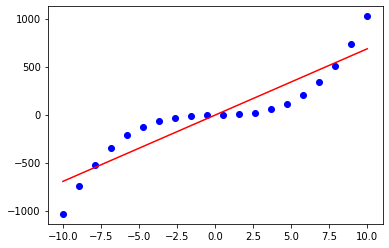

In [ ]:
plt.plot(X, y, 'bo')
k, b = np.polyfit(X.flatten(), y, deg=1)
plt.plot(X, k * X + b, 'r-')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(np.vstack((X, X ** 3)).T, y)

LinearRegression()

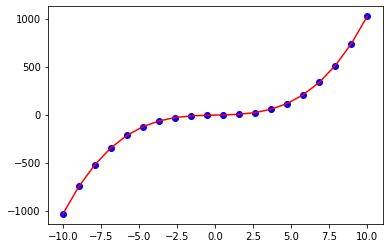

In [ ]:
plt.plot(X, y, 'bo')
plt.plot(X, linreg.coef_[0] * X + linreg.coef_[1] * X ** 3 + linreg.intercept_, 'r-')

$$ y = bias + w_1 * x_1 + w_2 * x_2 = bias + w_1 * x_1 + w_2 * {x_1}^2$$

In [ ]:
linreg.coef_, linreg.intercept_

(array([3., 1.]), -4.999999999999999)

**houses dataset**


In [ ]:
!wget -O houses_train.csv https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv
!wget -O houses_test.csv https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv

--2023-01-19 16:47:45--  https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘houses_train.csv’

houses_train.csv    100%[===================>] 449.88K  --.-KB/s    in 0.006s  

2023-01-19 16:47:45 (74.2 MB/s) - ‘houses_train.csv’ saved [460676/460676]

--2023-01-19 16:47:45--  https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]

In [ ]:
import pandas as pd

columns = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'SalePrice']
df = pd.read_csv('houses_train.csv').set_index('Id')[columns]

In [ ]:
X = df.drop(columns=['SalePrice']).to_numpy()
y = df['SalePrice'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
mean_squared_error(linreg.predict(X_train), y_train)

2140672607.6538696

In [ ]:
linreg.coef_

array([ -8.85744163,  50.7605105 , 105.18039453,  66.65706195])

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_linreg = mean_squared_error(y_test, y_pred)
mae_linreg = mean_absolute_error(y_test, y_pred)

print("MSE: {}\n MAE: {}".format(mse_linreg, mae_linreg))

MSE: 2125411092.7866356
 MAE: 28916.51268089065


In [ ]:
2140672607.6538696
2125411092

In [ ]:
(np.ones_like(y_train) * y_train.mean()).shape

(1168,)

In [ ]:
y_mean = np.ones_like(y_test) * y_train.mean()

mse_mean = mean_squared_error(y_test, y_mean)
mae_mean = mean_absolute_error(y_test, y_mean)

print("MSE: {}\n MAE: {}".format(mse_mean, mae_mean))

MSE: 7677095207.783831
 MAE: 62575.926451960964


In [ ]:
y_median = np.ones_like(y_test) * np.median(y_train)

mse_median = mean_squared_error(y_test, y_median)
mae_median = mean_absolute_error(y_test, y_median)

print("MSE: {}\n MAE: {}".format(mse_median, mae_median))

MSE: 7861866593.5239725
 MAE: 59568.25


In [ ]:
linreg.coef_

array([ -8.85744163,  50.7605105 , 105.18039453,  66.65706195])

In [ ]:
len(df_train)

1460

In [ ]:
len(df_test)

1459